In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


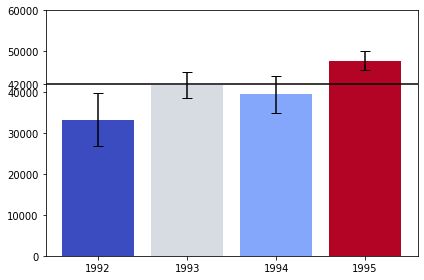

In [58]:
mean = df.mean(axis = 1)
std = df.std(axis = 1)

years = list(df.index)  
x = np.arange(len(years))

column = df.shape[1]

# 95% confidence intervals
yerr = std/np.sqrt(column) * stats.norm.ppf(1-0.05/2)
conf_ints = [stats.norm.interval(0.95, loc=mu, scale=se) for mu, se in zip(mean, std/np.sqrt(n))]

# Function to check probablility of the mean > y for each column
def compute_probs(y, conf_int):
    if y < np.min(conf_int):
        result = 1.0
    elif y > np.max(conf_int):
        result = 0.0
    else:
        result = (np.max(conf_int) - y)/(np.max(conf_int) - np.min(conf_int))
    return result

y = 42000

# Compute the probabilities
probs = [compute_probs(y, ci) for ci in conf_ints]

cmap = cm.get_cmap('coolwarm')
cpick = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])

plt.bar(x, mean, align='center', yerr=yerr, capsize=5, color = cpick.to_rgba(probs))

# Add the horizontal line and add its value as a y-tick
plt.axhline(y = y, zorder=1, color='k')
yt = plt.gca().get_yticks()
yt = np.append(yt, y)
plt.gca().set_yticks(yt)

plt.xticks(x, years)

plt.tight_layout()
plt.savefig('assignment3.png')
plt.show()